In [146]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sb

In [2]:
# Add data-set location as the parameters 
df = pd.read_csv("C:/Users/Rahul Kapoor/OneDrive/Desktop/Udemy/StartTech/Data Files/3. ST Academy - Decision Trees resource files/Movie_regression.csv",header = 0)

In [3]:
# First 5 data frames from the main data set
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
# EDD/Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Missing value Imputation

In [5]:
df["Time_taken"].mean()

157.39149797570855

In [6]:
df["Time_taken"].fillna(value = df["Time_taken"].mean(),inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Dummy Variable Creation

In [8]:
df = pd.get_dummies(df, columns = ["3D_available", "Genre"],drop_first=True)

In [19]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

## X-Y split

In [15]:
X = df.loc[: , df.columns != "Collection"]
type(X)

pandas.core.frame.DataFrame

In [16]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  3D_available_YES     506 non-null    uin

In [22]:
X.shape

(506, 19)

In [24]:
Y = df["Collection"]

In [25]:
Y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [26]:
type(Y)

pandas.core.series.Series

In [27]:
Y.shape

(506,)

## Test - Train Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

In [31]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,0,0,0


In [32]:
X_train.shape

(404, 19)

In [33]:
X_test.shape

(102, 19)

## Training Regression Tree

In [75]:
from sklearn import tree

In [35]:
regtree = tree.DecisionTreeRegressor(max_depth=3)

In [36]:
regtree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Predict values using Trained model

In [38]:
Y_train_pred = regtree.predict(X_train)
Y_test_pred = regtree.predict(X_test)

In [39]:
Y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

## Model Performance

In [41]:
from sklearn.metrics import mean_squared_error , r2_score

In [42]:
mean_squared_error(Y_test, Y_test_pred)

111364081.74002264

In [43]:
r2_score(Y_train,Y_train_pred)

0.8364651040556869

In [44]:
r2_score(Y_test, Y_test_pred)

0.6540678457568934

## Plotting Decision Trees

In [76]:
dot_data = tree.export_graphviz(regtree, out_file = None)

In [105]:
#Redundant
from IPython.display import Image

In [106]:
import pydotplus

In [107]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [1]:
#Redundant
#Image(graph.create_png())

[Text(465.0, 792.75, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(232.5, 566.25, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(116.25, 339.75, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(58.125, 113.25, 'mse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(174.375, 113.25, 'mse = 41209795.918\nsamples = 63\nvalue = 23514.286'),
 Text(348.75, 339.75, 'Lead_Actress_rating <= 9.315\nmse = 88194771.436\nsamples = 176\nvalue = 46798.864'),
 Text(290.625, 113.25, 'mse = 56301679.218\nsamples = 174\nvalue = 46187.356'),
 Text(406.875, 113.25, 'mse = 0.0\nsamples = 2\nvalue = 100000.0'),
 Text(697.5, 566.25, 'Budget <= 41312.535\nmse = 314082090.667\nsamples = 75\nvalue = 71624.0'),
 Text(581.25, 339.75, 'Multiplex coverage <= 0.341\nmse = 153862452.903\nsamples = 51\nvalue = 63043.137'),
 Text(523.125, 113.25, 'mse = 37226666.667\nsamples = 3\nvalue = 28

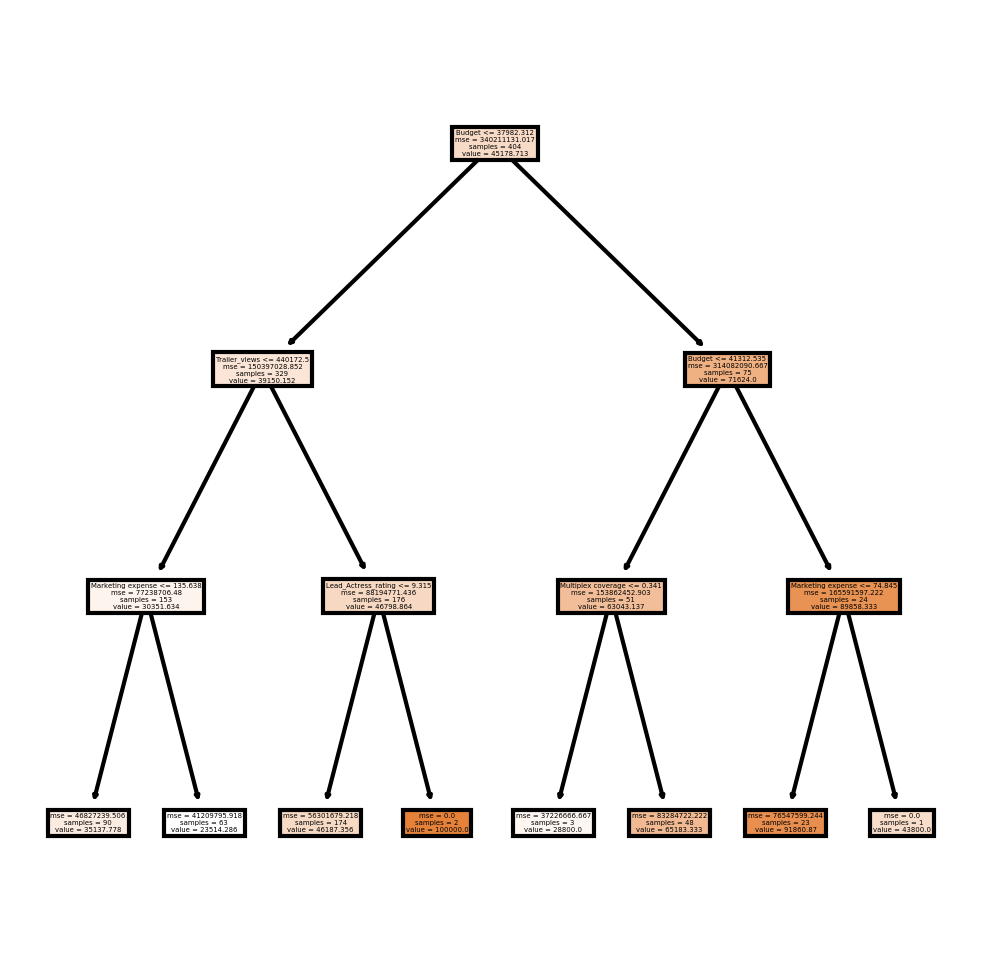

In [147]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(regtree,feature_names=X_train.columns,filled = True)

## Pruning a tree
Too big decision tree can lead to inefficient prediction of the test set
However, with limited depth of decision tree can also lead to less prediction
Therefore, we make a tree large enough and the omit it upto a certain depth

RSS + (alpha * T)


alpha = Tuning parameter (if alpha increases there is increase in penalty of having more and more splits)


T = number of leaf node

#### Types of pruning
pre pruning

post pruning

### Pre pruning

# Controlling tree growth using pruning

### Maximum number of levels in tree

[Text(465.0, 792.75, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(232.5, 566.25, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(116.25, 339.75, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(58.125, 113.25, 'mse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(174.375, 113.25, 'mse = 41209795.918\nsamples = 63\nvalue = 23514.286'),
 Text(348.75, 339.75, 'Lead_Actress_rating <= 9.315\nmse = 88194771.436\nsamples = 176\nvalue = 46798.864'),
 Text(290.625, 113.25, 'mse = 56301679.218\nsamples = 174\nvalue = 46187.356'),
 Text(406.875, 113.25, 'mse = 0.0\nsamples = 2\nvalue = 100000.0'),
 Text(697.5, 566.25, 'Budget <= 41312.535\nmse = 314082090.667\nsamples = 75\nvalue = 71624.0'),
 Text(581.25, 339.75, 'Marketing expense <= 167.869\nmse = 153862452.903\nsamples = 51\nvalue = 63043.137'),
 Text(523.125, 113.25, 'mse = 83284722.222\nsamples = 48\nvalue = 

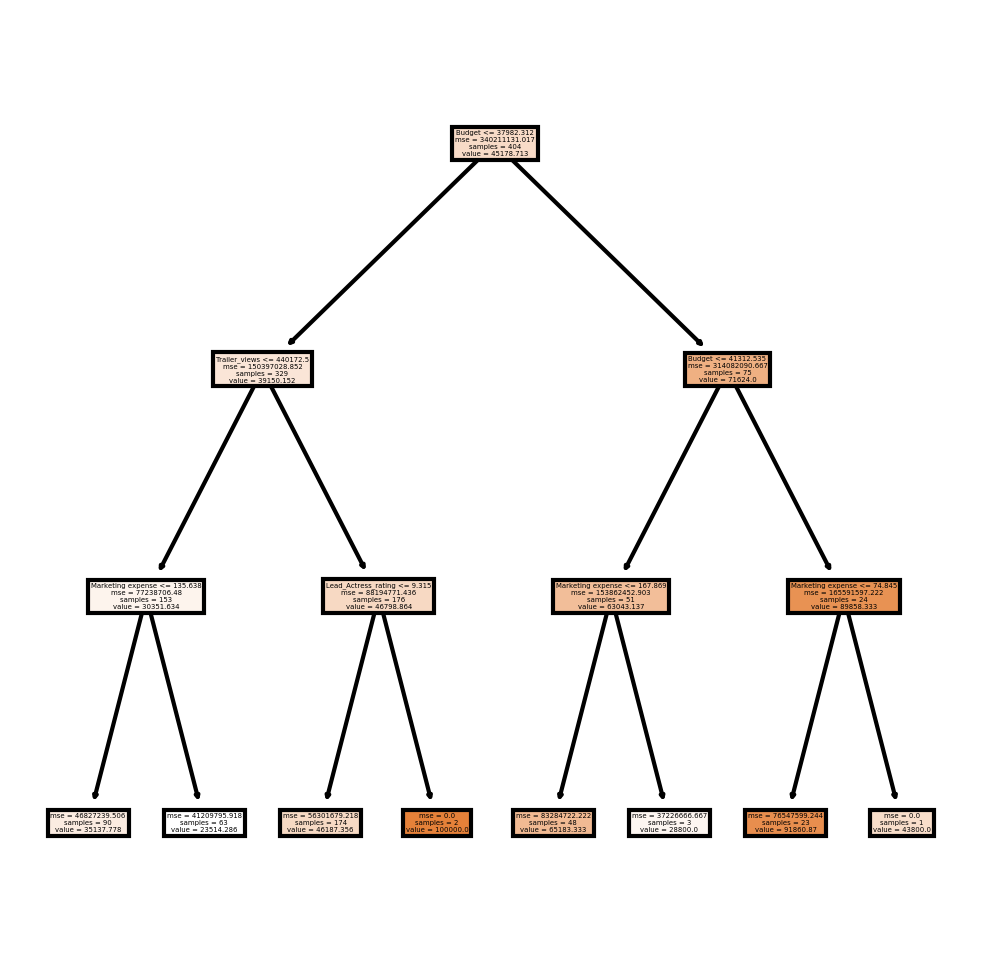

In [148]:
regtree1 = tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(X_train, Y_train)
dot_data = tree.export_graphviz(regtree1, out_file=None, feature_names=X_train.columns, filled = True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(regtree1,feature_names=X_train.columns,filled = True)

### Minimum observations at internal node

[Text(627.75, 860.7, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(418.5, 770.1, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(232.5, 679.5, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(93.0, 588.9000000000001, 'Movie_length <= 155.0\nmse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(46.5, 498.3, 'mse = 14200332.41\nsamples = 19\nvalue = 42357.895'),
 Text(139.5, 498.3, 'Trailer_views <= 387659.5\nmse = 37874897.838\nsamples = 71\nvalue = 33205.634'),
 Text(93.0, 407.70000000000005, 'mse = 36914720.571\nsamples = 29\nvalue = 29910.345'),
 Text(186.0, 407.70000000000005, 'Marketing expense <= 22.954\nmse = 25862970.522\nsamples = 42\nvalue = 35480.952'),
 Text(139.5, 317.1, 'mse = 7742222.222\nsamples = 9\nvalue = 41000.0'),
 Text(232.5, 317.1, 'mse = 20232139.578\nsamples = 33\nvalue = 33975.758'),
 Text(372.0, 588.9000000000001, 'Twitter_hastags

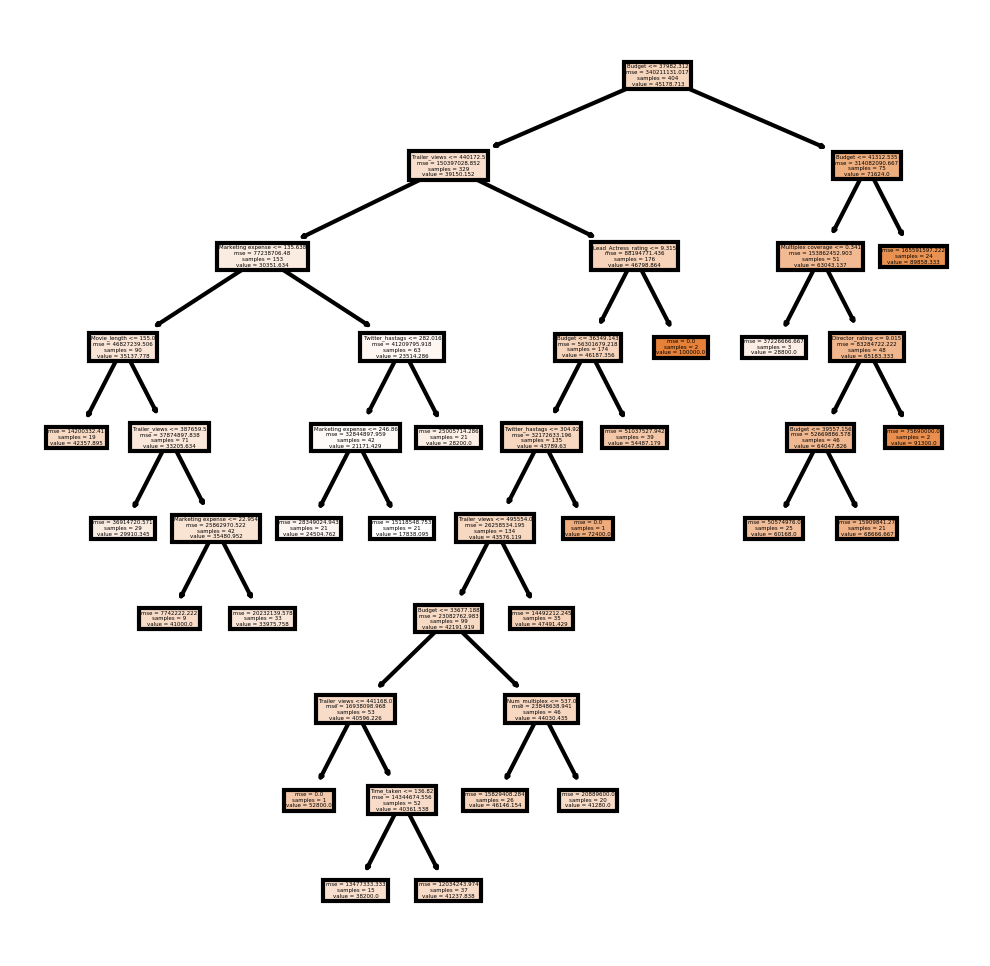

In [149]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split=40)
regtree2.fit(X_train, Y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None, feature_names=X_train.columns, filled = True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(regtree2,feature_names=X_train.columns,filled = True)

### Minimum observation at leaf node

[Text(607.0833333333333, 815.4, 'Budget <= 37982.312\nmse = 340211131.017\nsamples = 404\nvalue = 45178.713'),
 Text(387.5, 634.2, 'Trailer_views <= 440172.5\nmse = 150397028.852\nsamples = 329\nvalue = 39150.152'),
 Text(206.66666666666666, 453.0, 'Marketing expense <= 135.638\nmse = 77238706.48\nsamples = 153\nvalue = 30351.634'),
 Text(103.33333333333333, 271.80000000000007, 'Movie_length <= 158.6\nmse = 46827239.506\nsamples = 90\nvalue = 35137.778'),
 Text(51.666666666666664, 90.60000000000002, 'mse = 23726336.0\nsamples = 25\nvalue = 40792.0'),
 Text(155.0, 90.60000000000002, 'mse = 38686636.686\nsamples = 65\nvalue = 32963.077'),
 Text(310.0, 271.80000000000007, 'Trailer_views <= 362330.5\nmse = 41209795.918\nsamples = 63\nvalue = 23514.286'),
 Text(258.3333333333333, 90.60000000000002, 'mse = 36159853.076\nsamples = 33\nvalue = 20587.879'),
 Text(361.66666666666663, 90.60000000000002, 'mse = 26982222.222\nsamples = 30\nvalue = 26733.333'),
 Text(568.3333333333333, 453.0, 'Budge

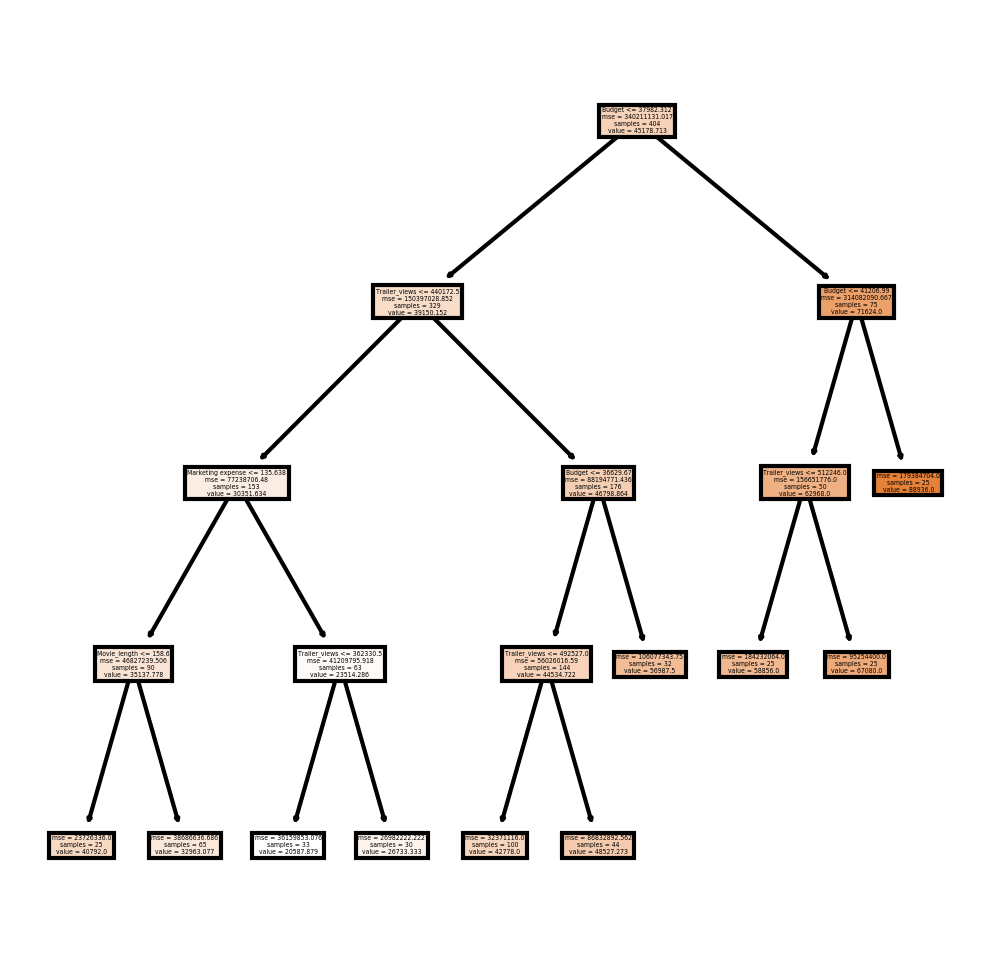

In [150]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf=25, max_depth=4)
regtree3.fit(X_train, Y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None, feature_names=X_train.columns, filled = True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(regtree3,feature_names=X_train.columns,filled = True)